### EnKF for 10 floors

### Observing multiple floors - with averaged values


In [1]:
import numpy as np

import matplotlib.pyplot as plt

from scipy.stats import norm

from scipy.special import factorial

from scipy.stats import gaussian_kde

floors = 10

### When changing number of observations, the variance of chaos vector needs manual change
observed = 1

nrv = 2
order = 2
npc = (factorial(nrv+order) / ( factorial(nrv) * factorial(order) )).astype(int)
pccoeff =  int( npc + observed )
## First index is floor number and second is PC coefficient


# First floor
u10 = 1.1 # mean
u11 = 0.2 # xi1 
u12 = 0.3 # xi2
u13 = 0.2 # xi1 ^2 - 1
u14 = 0.15 # xi1* xi2
u15 = 0.3 # xi2 ^2 - 1
u16 = 0
u17 = 0

# Second floor
u20 = 1.2
u21 = 0.4
u22 = 0.2
u23 = 0.16
u24 = 0.22
u25 = 0.31
u26 = 0 
u27 = 0


# Third floor
u30 = 1.3
u31 = 0.4
u32 = 0.3
u33 = 0.19
u34 = 0.15
u35 = 0.34
u36 = 0
u37 = 0


# 4 th floor
u40 = 0.9 # mean
u41 = 0.3 # xi1 
u42 = 0.2 # xi2
u43 = 0.24 # xi1 ^2 - 1
u44 = 0.19 # xi1* xi2
u45 = 0.28 # xi2 ^2 - 1
u46 = 0
u47 = 0

# 5 th floor
u50 = 1.15
u51 = 0.4
u52 = 0.1
u53 = 0.4
u54 = 0.1
u55 = 0.18
u56 = 0 
u57 = 0


# 6 th floor
u60 = 1.4
u61 = 0.4
u62 = 0.4
u63 = 0.2
u64 = 0.1
u65 = 0.3
u66 = 0
u67 = 0


# 7 th floor
u70 = 1.15 # mean
u71 = 0.5 # xi1 
u72 = 0.1 # xi2
u73 = 0.19 # xi1 ^2 - 1
u74 = 0.2 # xi1* xi2
u75 = 0.16 # xi2 ^2 - 1
u76 = 0
u77 = 0

# 8 th floor
u80 = 1.3
u81 = 0.5
u82 = 0.2
u83 = 0.2
u84 = 0.1
u85 = 0.25
u86 = 0 
u87 = 0


# 9 th floor
u90 = 1.27
u91 = 0.3
u92 = 0.2
u93 = 0.1
u94 = 0.05
u95 = 0.13
u96 = 0
u97 = 0

# 10 th floor
u100 = 1.05
u101 = 0.2
u102 = 0.2
u103 = 0.19
u104 = 0.26
u105 = 0.2
u106 = 0
u107 = 0



## Creating matrix A_u with all PC coefficient vectors

U0 = np.array([[u10], [u20], [u30], [u40], [u50], [u60], [u70], [u80], [u90], [u100]])
U1 = np.array([[u11], [u21], [u31], [u41], [u51], [u61], [u71], [u81], [u91], [u101]])
U2 = np.array([[u12], [u22], [u32], [u42], [u52], [u62], [u72], [u82], [u92], [u102]])

U3 = np.array([[u13], [u23], [u33], [u43], [u53], [u63], [u73], [u83], [u93], [u103]])
U4 = np.array([[u14], [u24], [u34], [u44], [u54], [u64], [u74], [u84], [u94], [u104]])
U5 = np.array([[u15], [u25], [u35], [u45], [u55], [u65], [u75], [u85], [u95], [u105]])


A_f = np.zeros((floors,pccoeff))

A_f[:,0] = U0.reshape(floors)
A_f[:,1] = U1.reshape(floors)
A_f[:,2] = U2.reshape(floors)
A_f[:,3] = U3.reshape(floors)
A_f[:,4] = U4.reshape(floors)
A_f[:,5] = U5.reshape(floors)



nsamp =  100000
prior_ensemble = np.zeros((nsamp,floors))

prior_alpha = np.zeros((nsamp,observed))

# np.rng(40)

np.random.seed(31)

# Ucheck = np.zeros((nsamp,1))

xi1 = np.random.normal(0,1, nsamp)
xi2 = np.random.normal(0,1, nsamp)


eta1 = np.random.normal(0,1,nsamp)
eta2 = np.random.normal(0,1,nsamp)
eta3 = np.random.normal(0,1,nsamp)
eta4 = np.random.normal(0,1,nsamp)
eta5 = np.random.normal(0,1,nsamp)
eta6 = np.random.normal(0,1,nsamp)
eta7 = np.random.normal(0,1,nsamp)
eta8 = np.random.normal(0,1,nsamp)
eta9 = np.random.normal(0,1,nsamp)
eta10 = np.random.normal(0,1,nsamp)


prior_ensemble[:,0] = A_f[0,0] * np.ones(nsamp) + A_f[0,1] *  xi1 + A_f[0,2] *  xi2  + A_f[0,3] *  (xi1**2 - 1) + A_f[0,4] *  (xi1 * xi2) \
    + A_f[0,5] *  (xi2 **2 -1) 



prior_ensemble[:,1] = A_f[1,0] * np.ones(nsamp) + A_f[1,1] *  xi1 + A_f[1,2] *  xi2 + A_f[1,3] *  (xi1**2 - 1) + A_f[1,4] *  (xi1 * xi2) \
    + A_f[1,5] *  (xi2 **2 -1)




prior_ensemble[:,2] = A_f[2,0] * np.ones(nsamp) + A_f[2,1] *  xi1 + A_f[2,2] *  xi2 + A_f[2,3] *  (xi1**2 - 1) + A_f[2,4] *  (xi1 * xi2) \
    + A_f[2,5] *  (xi2 **2 -1) 





prior_ensemble[:,3] = A_f[3,0] * np.ones(nsamp) + A_f[3,1] *  xi1 + A_f[3,2] *  xi2 + A_f[3,3] *  (xi1**2 - 1) + A_f[3,4] *  (xi1 * xi2) \
    + A_f[3,5] *  (xi2 **2 -1)



prior_ensemble[:,4] = A_f[4,0] * np.ones(nsamp) + A_f[4,1] *  xi1 + A_f[4,2] *  xi2 + A_f[4,3] *  (xi1**2 - 1) + A_f[4,4] *  (xi1 * xi2) \
    + A_f[4,5] *  (xi2 **2 -1)





prior_ensemble[:,5] = A_f[5,0] * np.ones(nsamp) + A_f[5,1] *  xi1 + A_f[5,2] *  xi2 + A_f[5,3] *  (xi1**2 - 1) + A_f[5,4] *  (xi1 * xi2) \
    + A_f[5,5] *  (xi2 **2 -1) 




prior_ensemble[:,6] = A_f[6,0] * np.ones(nsamp) + A_f[6,1] *  xi1 + A_f[6,2] *  xi2  + A_f[6,3] *  (xi1**2 - 1) + A_f[6,4] *  (xi1 * xi2) \
    + A_f[6,5] *  (xi2 **2 -1) 




prior_ensemble[:,7] = A_f[7,0] * np.ones(nsamp) + A_f[7,1] *  xi1 + A_f[7,2] *  xi2  + A_f[7,3] *  (xi1**2 - 1) + A_f[7,4] *  (xi1 * xi2) \
    + A_f[7,5] *  (xi2 **2 -1) 


prior_ensemble[:,8] = A_f[8,0] * np.ones(nsamp) + A_f[8,1] *  xi1 + A_f[8,2] *  xi2 + A_f[8,3] *  (xi1**2 - 1) + A_f[8,4] *  (xi1 * xi2) \
    + A_f[8,5] *  (xi2 **2 -1) 




prior_ensemble[:,9] = A_f[9,0] * np.ones(nsamp) + A_f[9,1] *  xi1 + A_f[9,2] *  xi2 + A_f[9,3] *  (xi1**2 - 1) + A_f[9,4] *  (xi1 * xi2) \
    + A_f[9,5] *  (xi2 **2 -1)



if(observed ==2) :

    prior_alpha[:,0] = ( prior_ensemble[:,0] + prior_ensemble[:,1] + prior_ensemble[:,2] + prior_ensemble[:,3] + prior_ensemble[:,4])

    prior_alpha[:,1] = (prior_ensemble[:,5] + prior_ensemble[:,6] + prior_ensemble[:,7] + prior_ensemble[:,8] + prior_ensemble[:,9])

elif (observed ==3):

    prior_alpha[:,0] = ( prior_ensemble[:,0] + prior_ensemble[:,1] + prior_ensemble[:,2])

    prior_alpha[:,1] = ( prior_ensemble[:,3] + prior_ensemble[:,4] + prior_ensemble[:,5])

    prior_alpha[:,2] = ( prior_ensemble[:,6] + prior_ensemble[:,7] + prior_ensemble[:,8] + prior_ensemble[:,9])


elif(observed == 1):

    prior_alpha[:,0] = ( prior_ensemble[:,0] + prior_ensemble[:,1] + prior_ensemble[:,2] + prior_ensemble[:,3] + prior_ensemble[:,4] + prior_ensemble[:,5] \
                        + prior_ensemble[:,6] + prior_ensemble[:,7] + prior_ensemble[:,8] + prior_ensemble[:,9] )
    



## forecast : sample mean and sample covariance matrix


x_k_mean = np.mean(prior_ensemble, axis=0)

P_k = np.zeros((floors,floors))


P_k = np.cov(prior_ensemble,rowvar=False)

print("forecast mean is", x_k_mean.shape)


print("forecast cov is", P_k.shape)



# varpclinear = [1, 1, 1, 1, 1, 1, 1,1,1,1,1,1,1]


varpcnonlinear = [1, 1, 1, 2, 1, 2, 1,1, 1, 1, 1, 1, 1, 1, 1, 1]

# varpcnonlinear = [1, 1, 1, 2, 1, 2, 1,1]

P_k_pckf = np.zeros((floors,floors))


for i in range(1,pccoeff):
    P_k_pckf = P_k_pckf + varpcnonlinear[i] * (A_f[:,i].reshape(floors,1) @  (A_f[:,i].reshape(floors,1)).T)


check = P_k_pckf - P_k

print("difference covariance between pckf and enkf is", check)

print("max of check is", np.amax(check))



Hk = np.zeros((observed,floors))

# Hk = np.zeros((observed,pccoeff))

if (observed == 2):
    Hk = np.array([[1, 1, 1, 1 , 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]])
elif (observed == 3):
    Hk = np.array([[1, 1, 1, 0 , 0, 0, 0, 0, 0, 0], [0, 0, 0, 1 , 1, 1, 0, 0, 0, 0], [0, 0, 0, 0 , 0, 0, 1, 1, 1, 1]])
elif (observed == 5):
    Hk = np.array([[1, 1, 0, 0 , 0, 0, 0, 0, 0, 0], [0, 0, 1,  1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0 , 1, 1, 0, 0, 0, 0], [0, 0, 0, 0 , 0, 0, 1, 1, 0, 0], [0, 0, 0, 0 , 0, 0, 0, 0, 1, 1]])
elif (observed == 1):
    Hk = np.array([[1, 1, 1, 1 , 1, 1, 1, 1, 1, 1]])



print("H_k matrix is",Hk)



dk = np.zeros((observed,floors))

# noise = np.eye(observed)
Gamma = np.eye(observed)

np.random.seed(69)

nsteps = 1

epsilon = np.random.normal(0,1,size=(observed,nsteps))


H_knoise = np.eye((observed))

truesample = np.loadtxt('./data_sample.txt')


print("true data sample is",truesample.reshape(observed,1))



if(observed == 2):

    noisevar = [18.35 , 30.61]
    noise = np.sqrt(noisevar).reshape(observed,1) * epsilon
    
elif (observed == 3):

    noisevar = [9 * 0.8, 7.99, 18.55]
    noise =  np.sqrt(noisevar).reshape(observed,1) * epsilon

elif(observed == 1):

    noisevar = [96.38]
    noise =  np.sqrt(noisevar).reshape(observed,1) * epsilon


print("noise is",noise)
# sample = sample.reshape(floors,1)

Gamma = Gamma * noisevar

# print(noise)
d_k = truesample.reshape(observed,1) + noise

print("noisy data",d_k)



truesamplefloor = np.zeros((floors,1))

truesamplefloor = np.loadtxt('./truesamplefloor.txt')


forecast mean is (10,)
forecast cov is (10, 10)
difference covariance between pckf and enkf is [[-2.88710663e-04 -6.23262020e-04 -3.73207246e-04 -6.82087163e-04
  -1.08376988e-03 -1.36827009e-04 -9.01459334e-04 -5.34082681e-04
  -1.30203252e-04 -6.78741269e-04]
 [-6.23262020e-04 -7.71889284e-04 -6.23873918e-04 -1.05764630e-03
  -1.82300535e-03 -4.04776326e-04 -1.05598552e-03 -7.87110785e-04
  -2.18203675e-04 -9.04694870e-04]
 [-3.73207246e-04 -6.23873918e-04 -4.56106202e-04 -8.73845806e-04
  -1.77709693e-03 -2.26496839e-04 -1.04247159e-03 -7.60539148e-04
  -1.78946158e-04 -6.64325904e-04]
 [-6.82087163e-04 -1.05764630e-03 -8.73845806e-04 -1.05656996e-03
  -1.37328160e-03 -6.01190191e-04 -1.16253159e-03 -9.56308308e-04
  -3.60930170e-04 -8.93402326e-04]
 [-1.08376988e-03 -1.82300535e-03 -1.77709693e-03 -1.37328160e-03
  -1.23935640e-03 -1.42899721e-03 -1.55987530e-03 -1.81136544e-03
  -8.77389051e-04 -7.84042454e-04]
 [-1.36827009e-04 -4.04776326e-04 -2.26496839e-04 -6.01190191e-04
  -1

perturbation size is (1, 100000)
sample noise covariance is 95.63977170162639
d_ki is [[17.00799537]
 [34.34380415]
 [17.02902249]
 ...
 [41.91966676]
 [30.34025121]
 [47.71843361]]
Kalman gain is 
 [[0.02867581]
 [0.03228748]
 [0.03509908]
 [0.03066982]
 [0.03199194]
 [0.03500567]
 [0.02862597]
 [0.0326492 ]
 [0.01942797]
 [0.02440493]]
(100000, 10)
updated mean is [[1.41804818]
 [1.55929853]
 [1.6902293 ]
 [1.24096438]
 [1.50655735]
 [1.78874478]
 [1.46930903]
 [1.66384446]
 [1.48611241]
 [1.32072758]]
updated covariance is [[0.3008568  0.29752873 0.33582803 0.29332496 0.26873086 0.33847416
  0.22090388 0.2779049  0.16973961 0.24034153]
 [0.29752873 0.35052278 0.37083854 0.3182352  0.3022096  0.35845034
  0.29888762 0.33800925 0.19832529 0.25550461]
 [0.33582803 0.37083854 0.40856321 0.34422538 0.32769993 0.40790192
  0.30491698 0.36549628 0.22116141 0.27113709]
 [0.29332496 0.3182352  0.34422538 0.31081326 0.3189455  0.33726229
  0.27003541 0.30929071 0.17939706 0.25140603]
 [0.2687

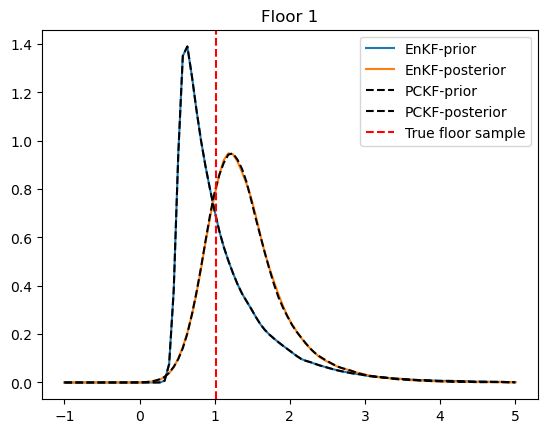

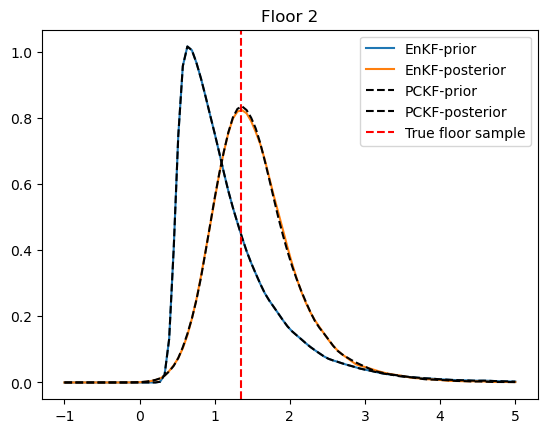

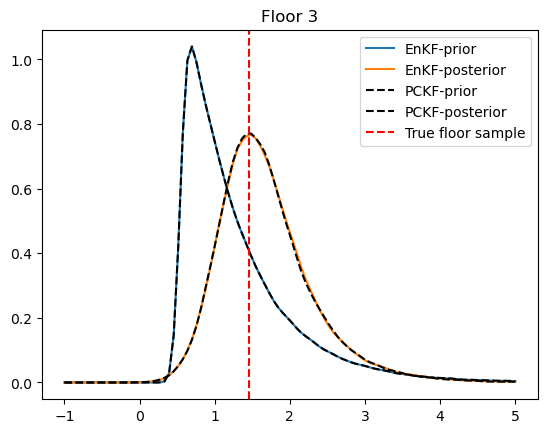

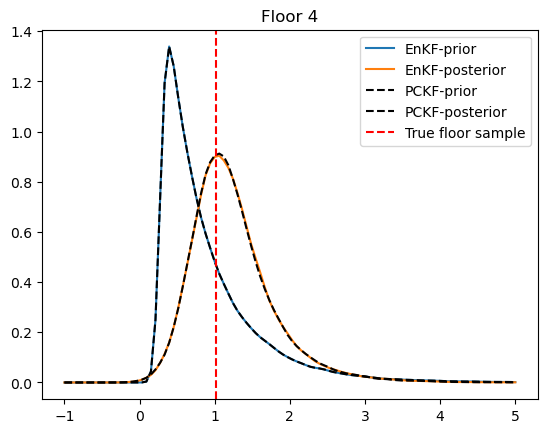

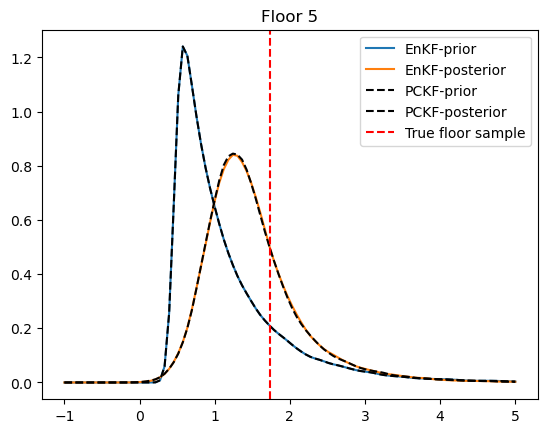

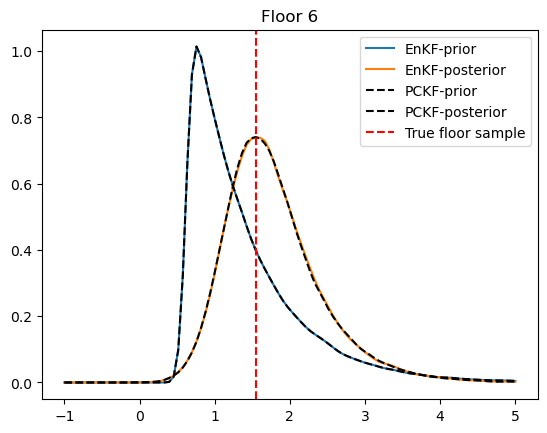

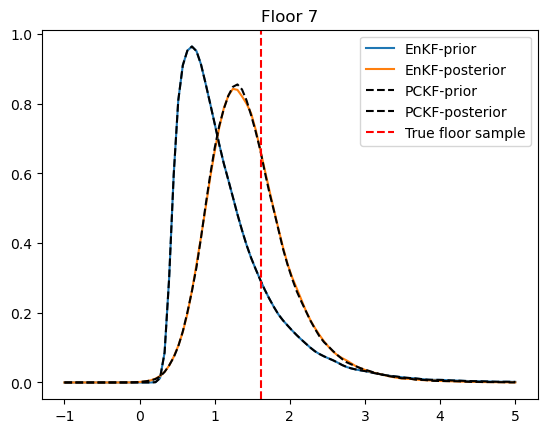

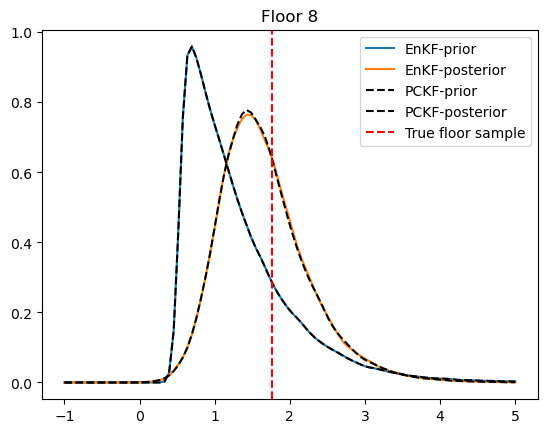

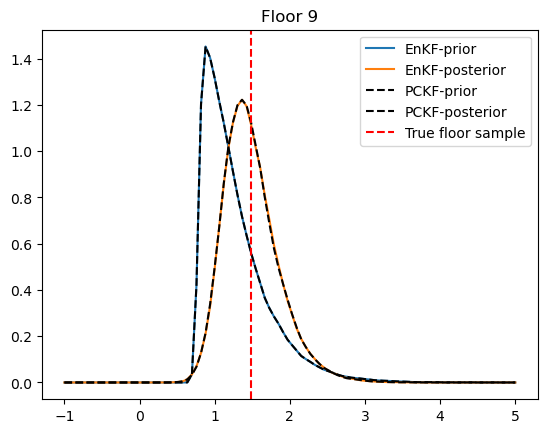

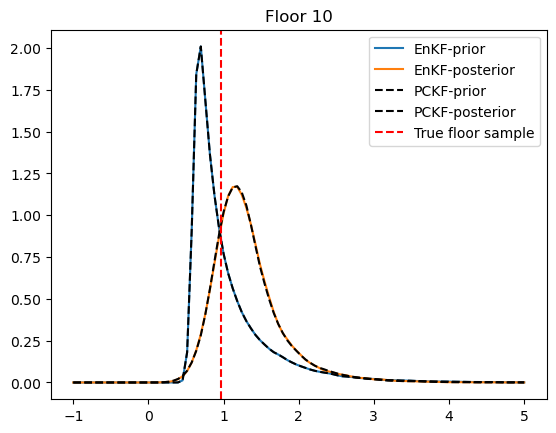

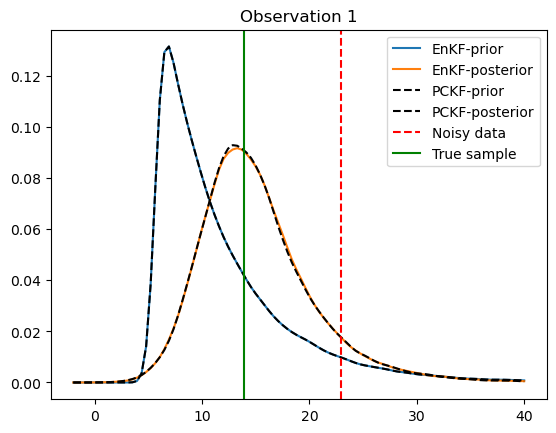

In [2]:


# perturbed samples

e = np.random.normal(0,1,size=(observed,nsamp))

print("perturbation size is", e.shape)

for i in range(observed):
    e[i,:] = e[i,:] * np.sqrt(Gamma[i,i])

gamma_sample = np.cov(e)


print("sample noise covariance is",gamma_sample)


d_ki =  np.zeros((nsamp,observed))

P_a = np.zeros((floors,floors))



for i in range(nsamp):
    d_ki[i,:] = (d_k + e[:,i].reshape(observed,1)).reshape(observed)


print("d_ki is", d_ki)


K_g = P_k @ Hk.T @ np.linalg.inv(Hk @ P_k @ Hk.T + gamma_sample)


print("Kalman gain is \n", K_g)

### Update state using samples

update_ensemble = np.zeros((nsamp,floors))

for i in range(nsamp):
    sample = prior_ensemble[i,:].reshape(floors,1) + K_g @ (d_ki[i,:].reshape(observed,1) - Hk @ prior_ensemble[i,:].reshape(floors,1))
    update_ensemble[i,:] = sample.reshape(floors)


### updated sample means and cov

print(update_ensemble.shape)

x_a_mean = np.mean(update_ensemble, axis=0)

x_a_mean = x_a_mean.reshape(floors,1)

print("updated mean is", x_a_mean)

# for i in range(nsamp):
#     P_a = P_a + (x_ai[:,i].reshape(statesize,1) - x_a_mean) @ (x_ai[:,i].reshape(statesize,1) - x_a_mean).T

# P_a = P_a/ (nsamp - 1)

P_a = np.cov(update_ensemble,rowvar=False)

P_a_check = (np.identity(floors) - K_g @ Hk) @ P_k

print("updated covariance is", P_a)

print("updated covariance check is", P_a_check)



posterior_alpha = np.zeros((nsamp,observed))


if(observed ==2) :

    posterior_alpha[:,0] = ( update_ensemble[:,0] + update_ensemble[:,1] + update_ensemble[:,2] + update_ensemble[:,3] + update_ensemble[:,4])

    posterior_alpha[:,1] = (update_ensemble[:,5] + update_ensemble[:,6] + update_ensemble[:,7] + update_ensemble[:,8] + update_ensemble[:,9])

elif (observed ==3):

    posterior_alpha[:,0] = ( update_ensemble[:,0] + update_ensemble[:,1] + update_ensemble[:,2])

    posterior_alpha[:,1] = ( update_ensemble[:,3] + update_ensemble[:,4] + update_ensemble[:,5])

    posterior_alpha[:,2] = ( update_ensemble[:,6] + update_ensemble[:,7] + update_ensemble[:,8] + update_ensemble[:,9])


elif(observed == 1):

    posterior_alpha[:,0] = ( update_ensemble[:,0] + update_ensemble[:,1] + update_ensemble[:,2] + update_ensemble[:,3] + update_ensemble[:,4] + update_ensemble[:,5] \
                        + update_ensemble[:,6] + update_ensemble[:,7] + update_ensemble[:,8] + update_ensemble[:,9] )
    



x1 = np.linspace(-1,5, 100)

x2 = np.linspace(-1,5, 100)


kde_floor = np.zeros((100,floors))

kde_floor_up = np.zeros((100,floors))




pzfile_prior = np.load('./pckf_prior_pdfs.npz')

pckf_prior = pzfile_prior['x']

pzfile_update = np.load('./pckf_update_pdfs.npz')

pckf_update = pzfile_update['x']

for i in range(floors):

    kde1 = gaussian_kde(prior_ensemble[:,i], bw_method='scott')
    kde2 = gaussian_kde(update_ensemble[:,i], bw_method='scott')

    kde_floor[:,i] = kde1(x1)
    kde_floor_up[:,i] = kde2(x2)

    plt.figure(i)
    plt.title(f"Floor {i+1}")
    plt.plot(x1,kde_floor[:,i],label = 'EnKF-prior')
    plt.plot(x2,kde_floor_up[:,i],label = 'EnKF-posterior')
    plt.plot(x1,pckf_prior[:,i],'k--',label = 'PCKF-prior')
    plt.plot(x2,pckf_update[:,i],'k--',label = 'PCKF-posterior')
    plt.axvline(truesamplefloor[i], color='red', linestyle='--', label=f'True floor sample')
    plt.legend()
    plt.savefig(f'pckf_enkf_{i}.pdf')
    plt.show()




x11 = np.linspace(-2,40, 100)

x12 = np.linspace(-2,40, 100)


kde_alpha = np.zeros((100,observed))

kde_alpha_up = np.zeros((100,observed))


pzfile_alpha = np.load('./pckf_prior_alpha.npz')

pckf_prior_alpha = pzfile_alpha['x']

pzfile_alpha = np.load('./pckf_update_alpha.npz')

pckf_update_alpha = pzfile_alpha['x']


for j in range(observed):

    kde11 = gaussian_kde(prior_alpha[:,j], bw_method='scott')
    kde12 = gaussian_kde(posterior_alpha[:,j], bw_method='scott')

    kde_alpha[:,j] = kde11(x11)
    kde_alpha_up[:,j] = kde12(x12)

    plt.figure(j)
    plt.title(f"Observation {j+1}")
    plt.plot(x11,kde_alpha[:,j],label = 'EnKF-prior')
    plt.plot(x12,kde_alpha_up[:,j],label = 'EnKF-posterior')
    plt.plot(x11,pckf_prior_alpha[:,j],'k--',label = 'PCKF-prior')
    plt.plot(x12,pckf_update_alpha[:,j],'k--',label = 'PCKF-posterior')
    plt.axvline(d_k[j], color='red', linestyle='--', label=f'Noisy data')
    # plt.axvline(truesample[j], color='green', linestyle='-', label=f'True sample')
    plt.axvline(truesample, color='green', linestyle='-', label=f'True sample')
    plt.legend()
    plt.savefig(f'pdfs_avergaed_{j}.pdf')
    plt.show()






In [3]:


# if(observed == 1):
#     npzfile_prior = np.load('./enkf_prior_1data_nonlinear.npz')
#     npzfile_posterior = np.load('./enkf_prior_1data_nonlinear.npz')
# else:
#     npzfile_prior = np.load('./enkf_prior_2data_nonlinear.npz')
#     npzfile_posterior = np.load('./enkf_prior_2data_nonlinear.npz')


# print(npzfile_prior)

# print(npzfile_posterior)

# plt.figure(1)
# plt.title("Floor 1")
# plt.plot(x1,npzfile_prior['x'],label = 'EnKF-prior')
# plt.plot(x1,npzfile_posterior['x'],label = 'EnKF-posterior')
# plt.plot(x1,kde_floor1,'k--',label = 'PCKF-prior')
# plt.plot(x1,kde_floor1_up,'k--',label = 'PCKF-posterior')
# # plt.axvline(dk[0,0], color='red', linestyle='--', label='data point- floor 1')
# plt.legend()
# plt.savefig('PCKF_floor1_1data_nonlinear.pdf')
# plt.show()